<a href="https://colab.research.google.com/github/saikrishnareddypalle/Hotel-booking-analysis/blob/main/Final_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!


## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/Alma Better/Python for data science/capstone - Hotel Booking Analysis/Copy of Hotel Bookings.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
1) country
2) children
3) agent
4) company 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df_a = df.drop(columns= ['agent', 'company', 'adults'])

In [ ]:
df_a.head(2)

In [ ]:
df_a[df_a['is_canceled'] != 1].groupby('distribution_channel').agg({'adr': 'sum'}).sort_values(by='adr',ascending=False)

In [ ]:
df_a.groupby('distribution_channel').agg({'adr': 'sum'}).sort_values(by='adr',ascending=False)

In [ ]:
df_a.groupby('distribution_channel').agg({'adr': 'mean'}).sort_values(by='adr',ascending=False)

In [ ]:
df_a['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df_a[df_a['is_canceled'] != 1]['hotel'].value_counts()

City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

In [ ]:
df_count = df_a[df_a['is_canceled'] != 1].groupby(['country','hotel']).agg({'hotel': 'count'})
df_count

hotel
country hotel              
ABW     City Hotel        2
AGO     City Hotel      140
        Resort Hotel     17
AIA     City Hotel        1
ALB     City Hotel        8
...                     ...
VNM     Resort Hotel      2
ZAF     City Hotel       36
        Resort Hotel     13
ZMB     Resort Hotel      1
ZWE     Resort Hotel      2

[268 rows x 1 columns]

In [ ]:
df_count.rename(columns={'hotel': 'no_of_bookings'},inplace=True)

In [ ]:
df_count.sort_values(by='no_of_bookings', ascending=False).head(20)

In [ ]:
df_count2 = df_a.groupby(['country','hotel']).agg({'hotel': 'count'})
df_count2

In [ ]:
df_count2.rename(columns={'hotel': 'no_of_bookings'},inplace=True)

In [ ]:
df_count2.sort_values(by='no_of_bookings', ascending=False).head(20)

In [ ]:
df_a.head(2)

In [ ]:
df_b = pd.DataFrame(df_a[df_a['is_canceled'] !=1 ][['lead_time','is_canceled']])

In [ ]:
df_b.groupby('is_canceled')['lead_time'].describe()

In [ ]:
df_b = pd.DataFrame(df_a[df_a['is_canceled'] ==1 ][['lead_time','is_canceled']])

In [ ]:
df_b.groupby('is_canceled')['lead_time'].describe()

In [ ]:
df_b.sort_values(by='lead_time', ascending=False)

In [ ]:
df_a.head(2)

In [ ]:
df_c = df_a[['hotel','arrival_date_month']]
df_c

In [ ]:
df_d = pd.DataFrame(df_c.groupby('arrival_date_month')['hotel'].value_counts())

In [ ]:
df_d

In [ ]:
df_d.rename(columns={'hotel':'no_of_bookings'}, inplace=True)
df_d

In [ ]:
# peak months are may, june, july and august

df_d.sort_values(by='no_of_bookings', ascending=False)

#Harsh Mudgil

#Determining distribution channels with high ADR per month

Distribution channels with highest ADR, per month should be the focus of the marketing spend, to attract more customers.

In [ ]:
df_a = df.groupby(['arrival_date_month','distribution_channel'])['adr'].mean().unstack()

In [ ]:
df_a = df_a.fillna(0)

In [ ]:
sns.scatterplot(data = df_a) #not actual plot below, only image.

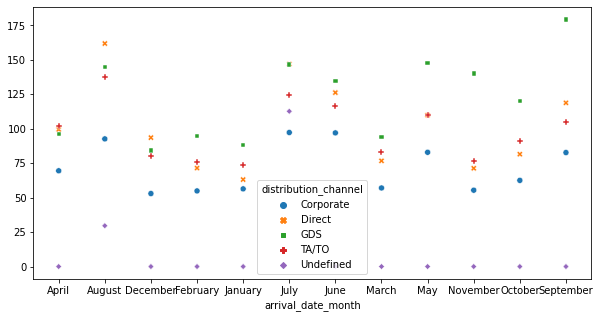

#Determining Distribution channel attracting most numbers of repeated guests, per month

In [ ]:
df_b = df.groupby(['arrival_date_month','distribution_channel'])['is_repeated_guest'].sum().unstack()

In [ ]:
df_b = df_b.fillna(0)

In [ ]:
sns.scatterplot(data = df_b)  #not actual plot below, only image. 

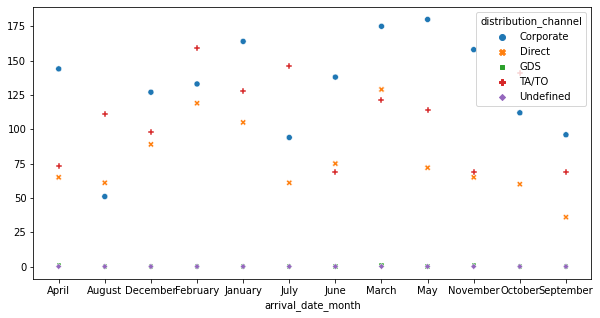

#Determining distribution channels with highest cancellation percentage per month

In [ ]:
df_c = df.groupby(['arrival_date_month','distribution_channel']).agg({'is_canceled':['count','sum']})
df_c['cancel_percent'] = (df_c['is_canceled'].loc[:,'sum']/df_c['is_canceled'].loc[:,'count'])*100
df_c.drop('is_canceled',axis=1,inplace=True)
df_c = df_c.unstack().fillna(0)
df_c[['Corporate', 'Direct','GDS','TA/TO','Undefined']] = df_c.cancel_percent.loc[:,:'undefined']
df_c.drop('cancel_percent',axis = 1,inplace=True)

In [ ]:
sns.scatterplot(data = df_c) #not actual plot below, only image. 

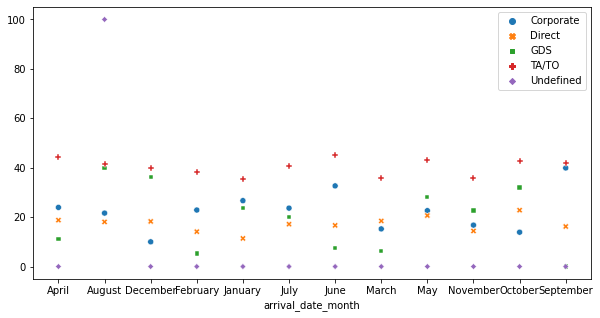

#Determining distribution channels, bringing in customers with most number of special requests, per month.

In [ ]:
df_d = df.groupby(['arrival_date_month','distribution_channel'])['total_of_special_requests'].sum().unstack()

In [ ]:
sns.scatterplot(data = df_d) #not actual plot below, only image. 

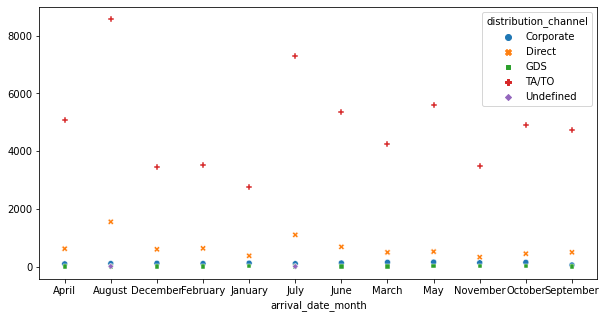

#Comprehensive Analysis plot coming up....